In [3]:
# Step 1: Data Preparation

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("D:\\Assignments questions\\Decision Tree\\Decision Tree\\heart_disease.xlsx")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
# Shape of the dataset
print("\nDataset shape (rows, columns):", df.shape)



Dataset shape (rows, columns): (908, 13)


In [6]:
# Column info
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [8]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


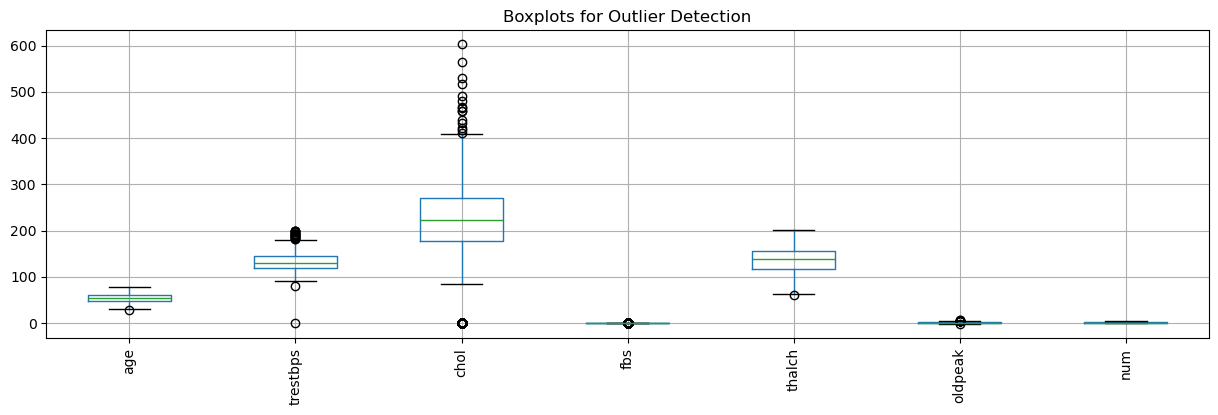

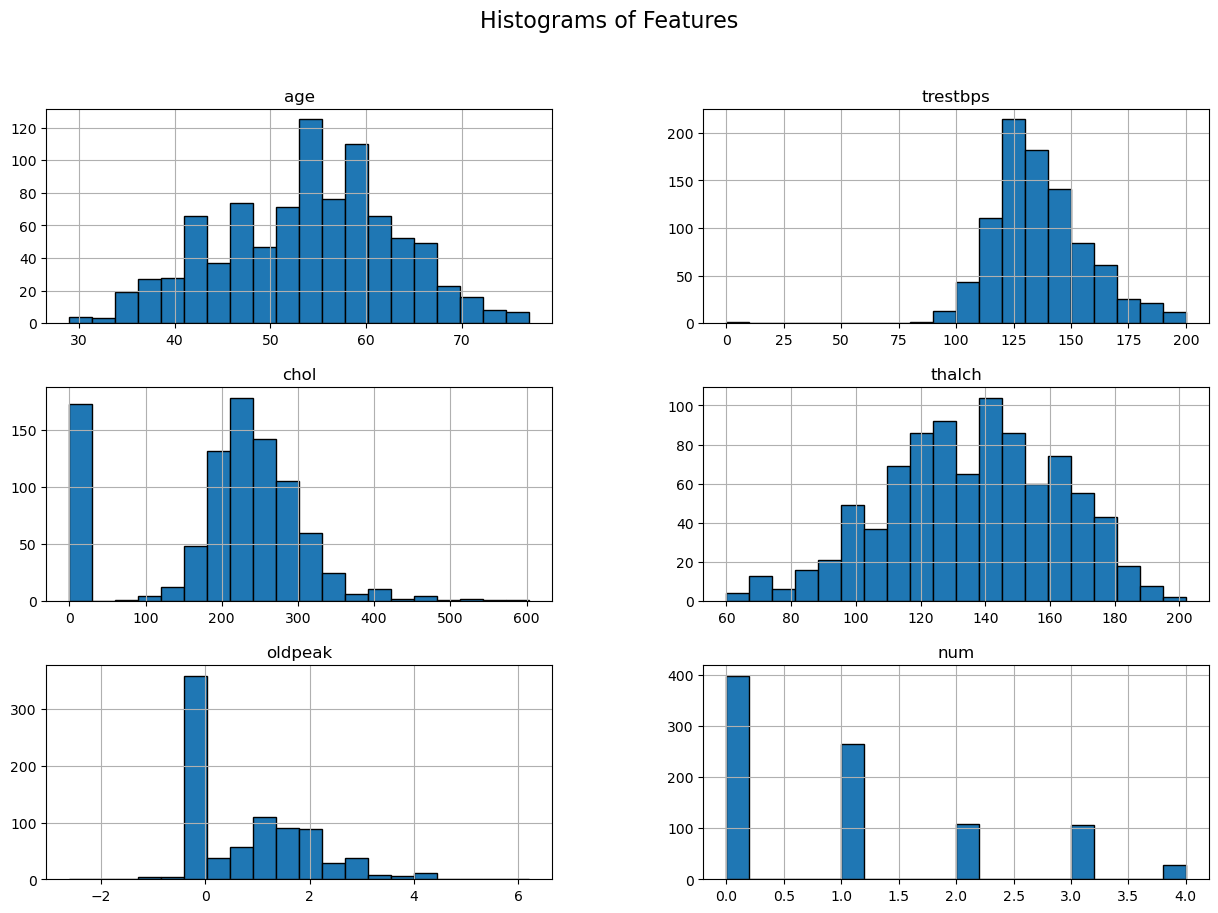

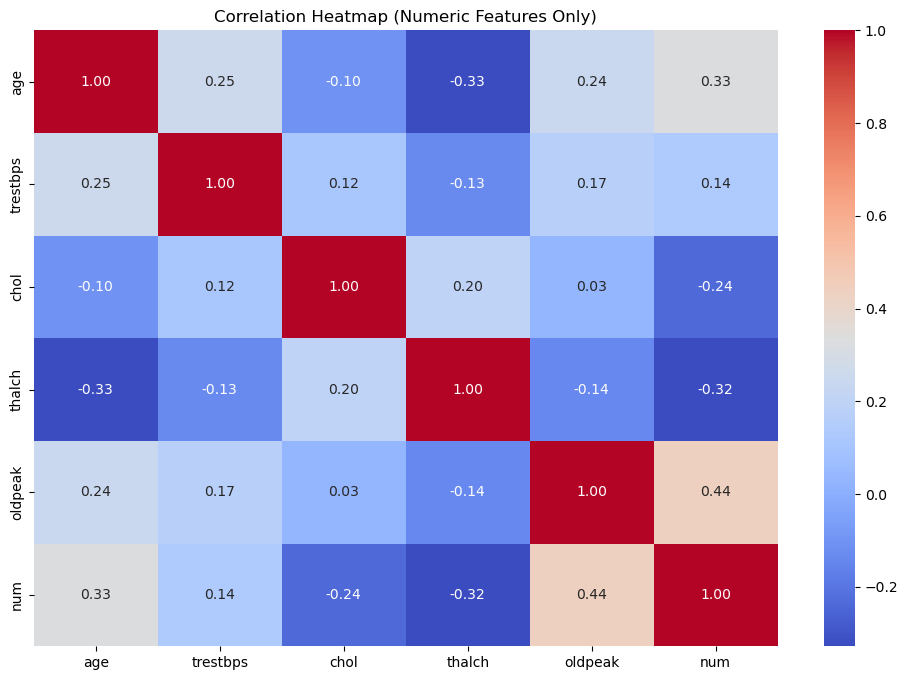

In [12]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
# --- 3. Check for outliers using boxplots ---
plt.figure(figsize=(15, 4))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()

# --- 4. Distribution of features (Histograms) ---
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# --- 5. Correlation Matrix ---

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# --- Handle Missing Values ---
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numerical
        df[col].fillna(df[col].median(), inplace=True)

# --- Encode Categorical Variables ---
le = LabelEncoder()
if 'sex' in df.columns:   # binary category
    df['sex'] = le.fit_transform(df['sex'])

# One-hot encoding for multi-category variables
df = pd.get_dummies(df, drop_first=True)

# --- Scale Numerical Features (optional for Decision Tree) ---
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature engineering completed. Dataset shape:", df.shape)
print(df.head())


Feature engineering completed. Dataset shape: (908, 20)
        age       sex  trestbps      chol    fbs    thalch   oldpeak  \
0  1.006027  0.514416  0.567394  0.281297   True  0.524183  1.354403   
1 -1.397560  0.514416  0.076967  0.013526  False -0.147705 -0.815718   
2  0.350503  0.514416  0.322181 -0.084656  False  0.449529 -0.438305   
3 -0.195767  0.514416 -0.756760 -0.138211  False  2.017268 -0.815718   
4  0.350503  0.514416 -1.149102 -0.004325  False -0.371668  0.599578   

        num  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0 -0.881977               False           False               True   
1 -0.881977                True           False              False   
2 -0.881977               False           False              False   
3 -0.881977               False           False               True   
4 -0.881977               False           False              False   

   thal_normal  thal_reversable defect  slope_flat  slope_upsloping  \
0        False     

C:\Users\munig\AppData\Local\Temp\ipykernel_10732\1246915657.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\munig\AppData\Local\Temp\ipykernel_10732\1246915657.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [28]:
# Convert target into binary (0 = no disease, 1 = disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Ensure integer dtype
df['num'] = df['num'].astype(int)



Accuracy: 0.6758241758241759
Precision: 0.38095238095238093
Recall: 0.32653061224489793
F1-score: 0.3516483516483517
ROC-AUC: 0.5655209452201934

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       133
           1       0.38      0.33      0.35        49

    accuracy                           0.68       182
   macro avg       0.57      0.57      0.57       182
weighted avg       0.66      0.68      0.67       182



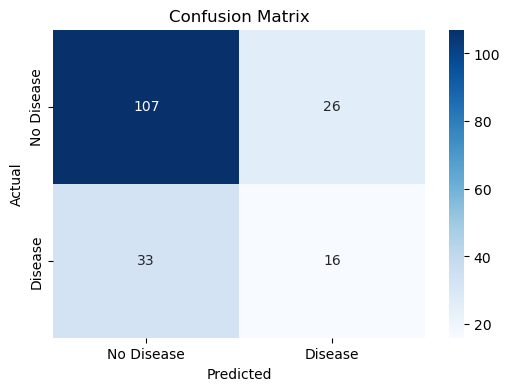

In [29]:
# Step 4: Decision Tree Classification

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define features (X) and target (y)
X = df.drop("num", axis=1)   # assuming 'target' is your label column
y = df["num"]

# --- Split dataset into Train (80%) and Test (20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Initialize Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)

# Train model
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease","Disease"], yticklabels=["No Disease","Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best score during CV
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1-score:", f1_score(y_test, y_pred))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.7783089277279168

Test Accuracy: 0.7362637362637363
Test Precision: 0.5161290322580645
Test Recall: 0.32653061224489793
Test F1-score: 0.4



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       133
           1       0.52      0.33      0.40        49

    accuracy                           0.74       182
   macro avg       0.65      0.61      0.62       182
weighted avg       0.71      0.74      0.71       182



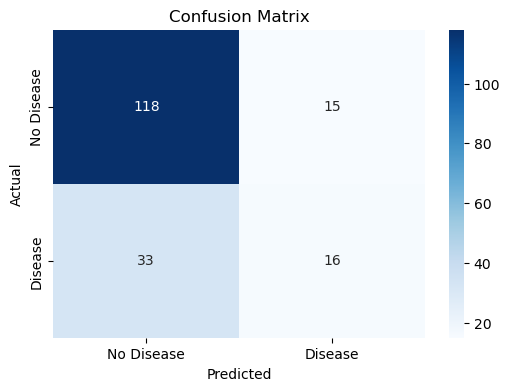

ROC-AUC Score: 0.7456651833665797


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- ROC-AUC (needs predicted probabilities) ---
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


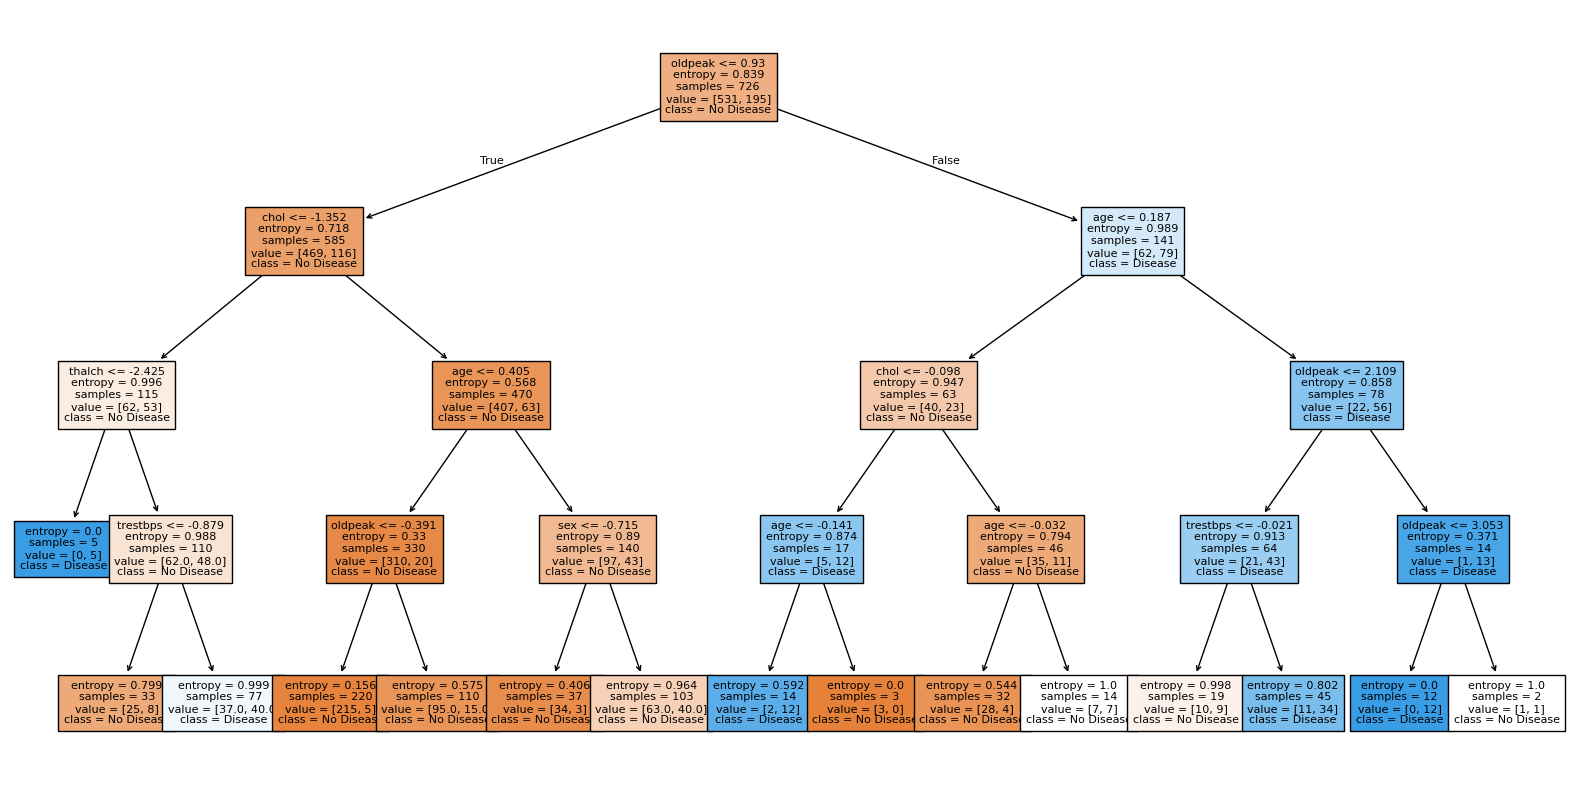

In [32]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, 
               feature_names=X.columns, 
               class_names=["No Disease", "Disease"], 
               filled=True, fontsize=8)
plt.show()


                     Feature  Importance
6                    oldpeak    0.340880
0                        age    0.295429
3                       chol    0.237781
1                        sex    0.052125
2                   trestbps    0.044515
5                     thalch    0.029270
4                        fbs    0.000000
7         cp_atypical angina    0.000000
8             cp_non-anginal    0.000000
9          cp_typical angina    0.000000
10               thal_normal    0.000000
11    thal_reversable defect    0.000000
12                slope_flat    0.000000
13           slope_upsloping    0.000000
14            restecg_normal    0.000000
15  restecg_st-t abnormality    0.000000
16                exang_True    0.000000
17               exang_FALSE    0.000000
18                exang_TURE    0.000000


C:\Users\munig\AppData\Local\Temp\ipykernel_10732\2905937775.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


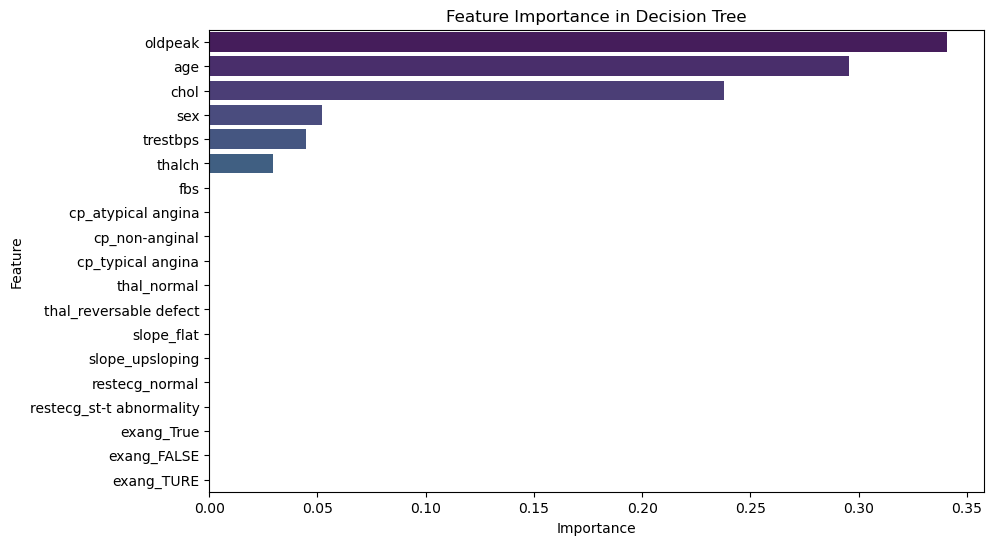

In [33]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in Decision Tree")
plt.show()


In [34]:
'''1. Common Hyperparameters of Decision Trees
max_depth → controls tree depth (prevents overfitting).
min_samples_split → min samples to split a node (higher = simpler tree).
min_samples_leaf → min samples in leaf (avoids very small leaves).
criterion → split quality (gini or entropy).
 These control model complexity vs. accuracy.'''

'1. Common Hyperparameters of Decision Trees\nmax_depth → controls tree depth (prevents overfitting).\nmin_samples_split → min samples to split a node (higher = simpler tree).\nmin_samples_leaf → min samples in leaf (avoids very small leaves).\ncriterion → split quality (gini or entropy).\n These control model complexity vs. accuracy.'

In [ ]:
'''Label Encoding vs One-Hot Encoding
Label Encoding: converts categories to numbers (Male=0, Female=1). Simple but may create false order.
One-Hot Encoding: creates separate binary columns for each category. No false order, but increases dataset size.
 Use Label for ordinal, One-Hot for nominal data.'''